# Exoplanet Detection using Light Curves 🌌🛰️

I made this model to review a NASA exoplanet dataset using data such as radius, flux, temperature, and gravity to find accuracy on exoplanet classification, thank me later humanity

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
data = pd.read_csv('exoplanet.csv', comment='#')
print(data.head())

X = data[['tce_period']].values
y = data['tce_rogue_flag'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     kepid  tce_plnt_num  tce_rogue_flag  tce_period  tce_period_err  \
0  2304168             2               0  431.719000        0.011803   
1  2304235             1               0    0.570607        0.000006   
2  2304566             1               0    0.689480        0.000048   
3  2304320             1               0   16.540800        0.000043   
4  2303365             2               0    0.520697        0.000009   

   tce_time0bk  tce_time0bk_err  tce_impact  tce_impact_err  tce_duration  \
0      219.298         0.018384      0.9308         0.03871        13.220   
1      132.049         0.000699      0.9000         0.26870         1.160   
2      131.833         0.019838      0.3085        45.49000         5.236   
3      133.952         0.002193      0.8848         0.22350         2.715   
4      132.003         0.000916      0.9008         0.41550         1.035   

   ...  tce_eqt  tce_eqt_err  tce_insol  tce_insol_err  tce_steff  \
0  ...    494.0        104.0      1

## Using LSTM Model because it is insane

In [7]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

c:\Users\abdul\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9398 - loss: 0.3541 - val_accuracy: 0.9549 - val_loss: 0.1636
Epoch 2/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9556 - loss: 0.1594 - val_accuracy: 0.9549 - val_loss: 0.1632
Epoch 3/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9551 - loss: 0.1626 - val_accuracy: 0.9549 - val_loss: 0.1634
Epoch 4/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9572 - loss: 0.1530 - val_accuracy: 0.9549 - val_loss: 0.1626
Epoch 5/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9568 - loss: 0.1580 - val_accuracy: 0.9549 - val_loss: 0.1634
Epoch 6/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9559 - loss: 0.1607 - val_accuracy: 0.9549 - val_loss: 0.1635
Epoch 7/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9575 - loss: 0.1536 - val_accuracy: 0.9549 - val_loss: 0.1621
Epoch 8/20
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9573 - loss: 0.1544 - val_accuracy: 0.

## Checking model accuracy with classification_report and confusion_matrix thanks to my LSTM model

In [8]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6500
           1       0.00      0.00      0.00       307

    accuracy                           0.95      6807
   macro avg       0.48      0.50      0.49      6807
weighted avg       0.91      0.95      0.93      6807

[[6500    0]
 [ 307    0]]


c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Good, now we plot accuracy and epoch loss

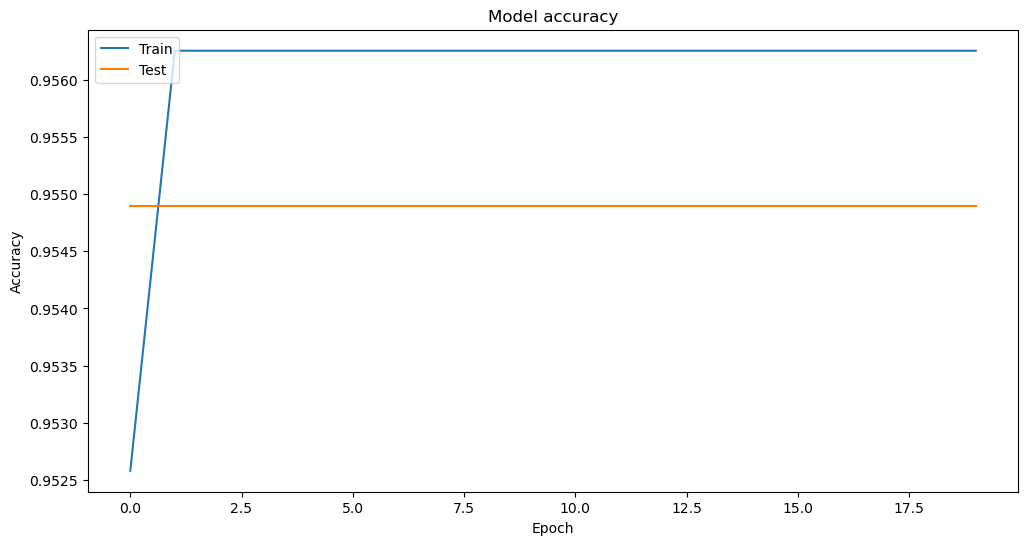

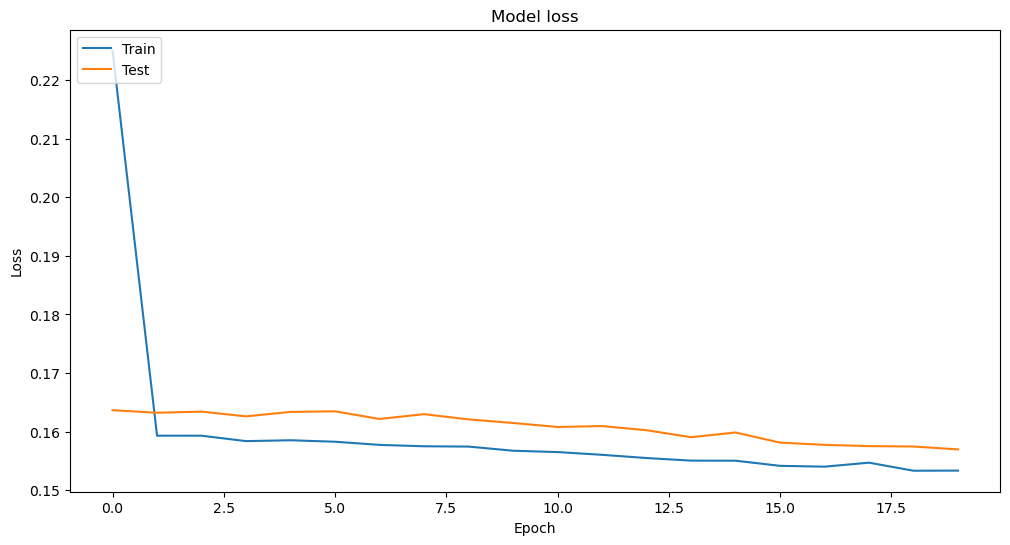

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()